## Análisis de Agrupamientos (Clustering)
### Notebook correspondiente al 
### Curso de postgrado/perfeccionamiento "Minería de Datos"
### Universidad Nacional de San Luis
### 25/10/18 - 14/12/18
#### lcagnina@unsl.edu.ar

In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['image.cmap'] = "gray"
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
# Función dendrogram y clustering jerárquico (ward) de SciPy
from scipy.cluster.hierarchy import dendrogram, ward

### Clustering particional vs jerárquico

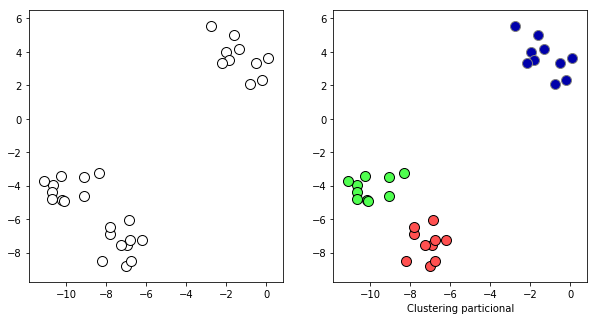

Text(0.5, 0, 'Clustering jerárquico')

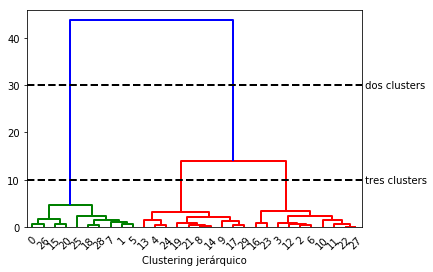

In [2]:
# datos sintéticos 2D para ejemplificar
X, y = make_blobs(random_state=1,n_samples=30)

# modelo del agrupamiento particional (x ej kmeans)
kmeans = KMeans(n_clusters=3);
kmeans.fit(X);

fig, axes=plt.subplots(1, 2, figsize=(10, 5))

#datos
mglearn.discrete_scatter(X[:, 0], X[:, 1],c='w',ax=axes[0])

#clustering paticional
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o',ax=axes[1])
plt.xlabel("Clustering particional");

plt.show();

#modelo de agrupamiento jerárquico (x ej ward)
#aplico clustering ward a los datos X (la función ward se Scipy devuelve las distancias)
linkage_array = ward(X)

#clustering jerárquico
# Dendrograma para el arreglo linkage_array (distancias entre grupos)
dendrogram(linkage_array)
ax = plt.gca()

# marco cortes para 2 y 3 grupos
bounds = ax.get_xbound()
ax.plot(bounds, [30, 30], '--', c='k')
ax.plot(bounds, [10, 10], '--', c='k')

ax.text(bounds[1], 30, ' dos clusters', va='center', fontdict={'size': 10})
ax.text(bounds[1], 10, ' tres clusters', va='center', fontdict={'size': 10})
plt.xlabel("Clustering jerárquico")



### Kmeans
El algoritmo itera alternanado el funcionamiento entre dos pasos: `Asignación(re)` y `Cálculo(re)`. Los datos se asignan (o reasignan) al grupo cuyo centroide sea más cercano y luego se calculan (o recalculan) los centroides en base a los nuevos puntos asignados a cada grupo.  

A continuación se observa un ejemplo del funcionamiento del algoritmo con datos sintéticos y k=3 (grupos).

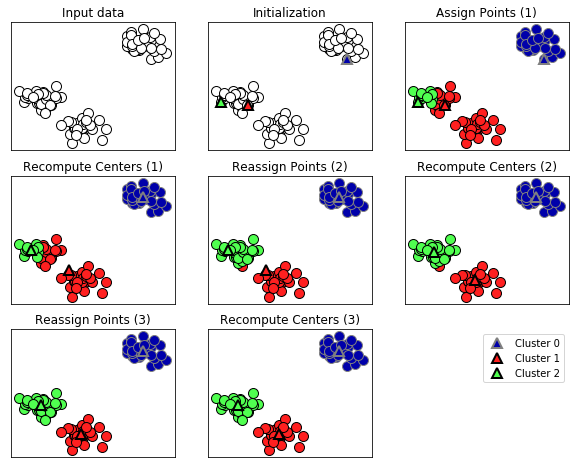

In [3]:
mglearn.plots.plot_kmeans_algorithm()

Luego de 3 iteraciones, el algoritmo no produce cambios en los centroides con lo cual finaliza el proceso y devuelve los tres grupos (identificados con los colores azúl, rojo y verde).

La siguiente figura muestra los límites de los centroides aprendidos por el algoritmo. 

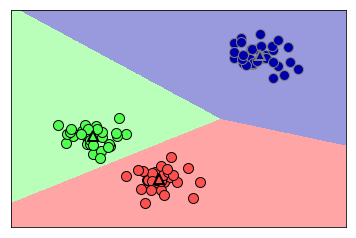

In [4]:
mglearn.plots.plot_kmeans_boundaries()

Para aplicar el algoritmo k-means de `scikit-learn` a los 30 datos sintéticos utilizados en los ejemplos anteriores, es necesario instanciar la clase k-means indicando la cantidad de cluster que se desean obtener y luego invocando al método `fit` con los datos. Con esto último se simula el proceso de entrenamiento de cualquier algoritmo de clasificación para obtener un modelo (de clustering en este caso).

In [5]:
# construcción del modelo de clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Durante la ejecución de k-means los datos son asignados a los grupos (3 en este caso). Para conocer a qué se asignó cada dato, se puede utilizar el atributo `kmeans.labels_` con el objeto del agrupamiento. Las etiquetas de los grupos son numéricas comenzando desde 0.

In [6]:
print("Miembros de cada cluster:\n{}".format(kmeans.labels_))

Miembros de cada cluster:
[1 1 0 0 2 1 0 1 2 2 0 0 0 2 2 1 0 2 1 2 1 2 0 0 2 1 1 0 1 2]


El modelo obtenido con k-means puede ser utilizado para predecir la membresia de nuevos datos en los 3 grupos ya modelados. En este sentido se puede observar cómo la tarea de clustering es similar a la de clasificación. Los nuevos puntos serán asignados al grupo cuyo centroide esté más cerca pero el modelo permancerá inalterable. Para realizar la predicción se utiliza el método `predict`. 

In [7]:
#prediciendo la membresía a los grupos con el mismo conjunto de datos de 'entrenamiento'
print('Predicción sobre el training: ',kmeans.predict(X))

#nuevos datos
X1, y1 = make_blobs(random_state=15,n_samples=30)
print('Predicción de nuevos datos:   ',kmeans.predict(X1))

Predicción sobre el training:  [1 1 0 0 2 1 0 1 2 2 0 0 0 2 2 1 0 2 1 2 1 2 0 0 2 1 1 0 1 2]
Predicción de nuevos datos:    [1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 2 0 1 1 1 2 1 1 1 0]


Para cambiar el agrupamiento (modelo entrenado e invariante obtenido antes) es necesario ejecutar nuevamente el algoritmo k-means. A continuación se muestra el modelo obtenido en la celda 5, se calcula un nuevo modelo (la inicialización aleatoria lo garantiza) con los mismos datos y se grafica el resultado. 

$Ejercicio$: enumere la membresía a los grupos de los datos X luego de que el nuevo modelo fue obtenido. Compare los resultados para verificar que los modelos son diferentes. 

Iter 0  para el modelo kmeans:
[[-1.743 -2.454]
 [-1.48  -9.056]
 [ 0.989 -1.264]]
Iter 0  para el modelo kmeans1:
[[ 0.702 -0.896]
 [-1.577 -9.465]
 [-1.384 -3.108]]
Modelo original vs Nuevo modelo luego de ejecutar k-means consecutivamente sobre los mismos datos


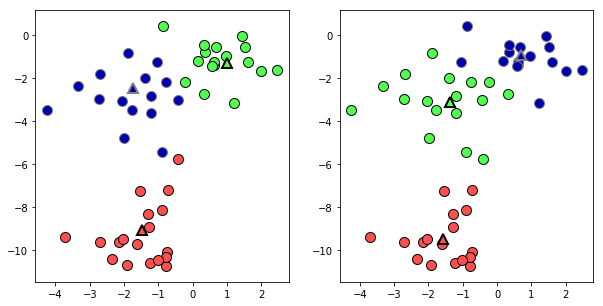

In [8]:
#más datos sino los ordena en la 1era itracion

#nuevos datos
X2, y2 = make_blobs(random_state=2,n_samples=50)

#una única ejecución, una sola iteración
kmeans = KMeans(n_clusters=3,n_init=1,max_iter=1)
#por defecto 10 ejecuciones con 300 iteraciones
#kmeans = KMeans(n_clusters=3)
kmeans.fit(X2)

print("Iter",kmeans.n_iter_," para el modelo kmeans:")
print(kmeans.cluster_centers_)

fig, axes=plt.subplots(1, 2, figsize=(10, 5))
mglearn.discrete_scatter(X2[:, 0], X2[:, 1], kmeans.labels_, markers='o',ax=axes[0])
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], [0,1,2],markers='^',markeredgewidth=2,ax=axes[0])

# construcción del nuevo modelo de clustering
#una única ejecución, una sola iteración
kmeans1 = KMeans(n_clusters=3,n_init=1,max_iter=1)
#por defecto 10 ejecuciones con 300 iteraciones
#kmeans = KMeans1(n_clusters=3)
kmeans1.fit(X2)

print("Iter",kmeans1.n_iter_," para el modelo kmeans1:")
print(kmeans1.cluster_centers_) 

mglearn.discrete_scatter(X2[:, 0], X2[:, 1], kmeans1.labels_, markers='o',ax=axes[1])
mglearn.discrete_scatter(
    kmeans1.cluster_centers_[:,0],kmeans1.cluster_centers_[:,1], [0,1,2],markers='^',markeredgewidth=2, ax=axes[1])
print('Modelo original vs Nuevo modelo luego de ejecutar k-means consecutivamente sobre los mismos datos')

Los mismos datos se pueden agrupar en más o menos grupos (no sólo 3 como hasta ahora).  

Mismos datos X pero ejecutando k-means con 2 y 4 grupos


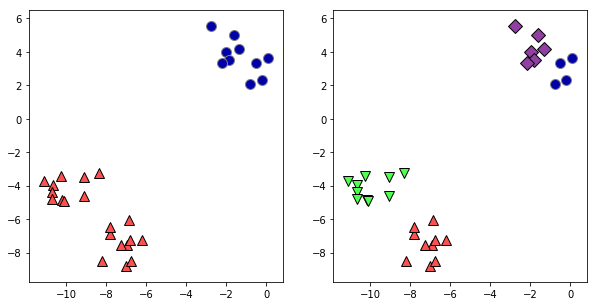

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 2 clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# 4 clusters 
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
print('Mismos datos X pero ejecutando k-means con 2 y 4 grupos')

#### Casos en los que k-means falla
k-means determina los grupos en base a los centroides con lo cual cada cluster tiene forma convexa. Como consecuencia de esta característica, k-means puede capturar formas relativamente simple. Además, k-means asume que todos los clusters tienen un diámetro similar (ver celda 4) ya que intenta determinar los límites de cada grupo utilizando la línea media entre los centroides de cada cluster. Estas asumciones conducen a resultados inesperados como se puede ver a continuación.

Según el sentido común, se hubiera esperado que las dos regiones densas de datos conformaran los grupos 1 y 2 mientras que la región menos densa, el grupo 3. Los resultados no apoyan esta idea.

Text(0, 0.5, 'Feature 1')

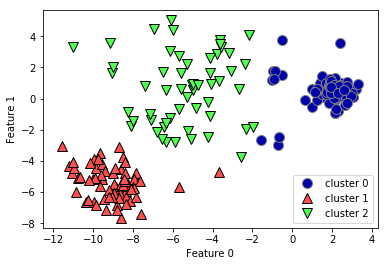

In [10]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Cuando los datos no están agrupados globularmente sino que se ajustan linealmente, k-means tiene problemas en determinar correctamente los grupos dado que determina la pertencencia a los grupos en base al centroide más cercano. El siguiente ejemplo muestra esto.

Text(0, 0.5, 'Feature 1')

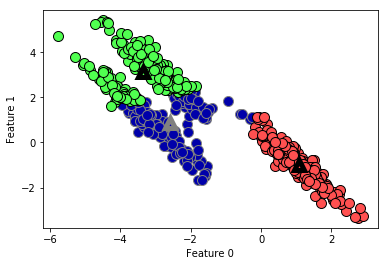

In [11]:
# generar puntos aleatorios
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transformar los datos para que se ajusten linealmente
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# dibujar la asignación a los grupos y los centroides
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=5)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Así mismo, para datos agrupados en formas más complejas como semi círculos, k-means también falla en determinar los grupos que podrían determinarse según el sentido común :)

Text(0, 0.5, 'Feature 1')

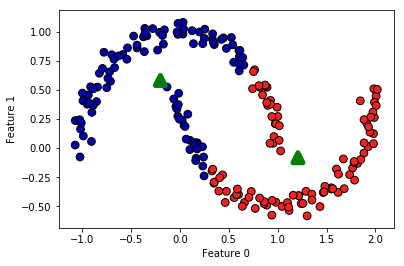

In [12]:
# generar datos sintéticos con forma de media luna
X_moon, y_moon = make_moons(n_samples=200, noise=0.05, random_state=0)

# clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_moon)
y_pred = kmeans.predict(X_moon)

# gráfico de la asignación de los datos en los grupos y centroides
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=5,
            edgecolor='g')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### DBSCAN
Density-Based Spatial Clustering of Application with Noise no requiere que se especifique el número de clusters a priori y obtiene buenos agrupamientos con datos de formas complejas e incluso detectar outliers. Dos parámetros deben ser especificados: `eps` y `min_samples`. Si existen al menos `min_samples` a una distancia `eps`, el punto será caracterizado como \emph{núcleo} y todos pertenecerán al mismo grupo. 


Pertenencia a los Clusters:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


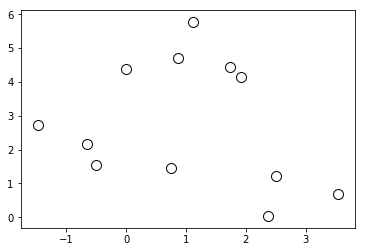

In [13]:
#contruir datos sintéticos
X, y = make_blobs(random_state=0, n_samples=12)

#graficamos los datos
mglearn.discrete_scatter(X[:, 0], X[:, 1],c='w')

#clustering con los parámetros por defecto
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Pertenencia a los Clusters:\n{}".format(clusters))

Todos los datos fueron caracterizados como `ruido` dado los parámetros por defecto del algoritmo y los puntos originales. Tiene sentido esto?

Probemos con diferentes parámetros. Observar la distinción entre los puntos ruido, núcleo y los bordes.

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


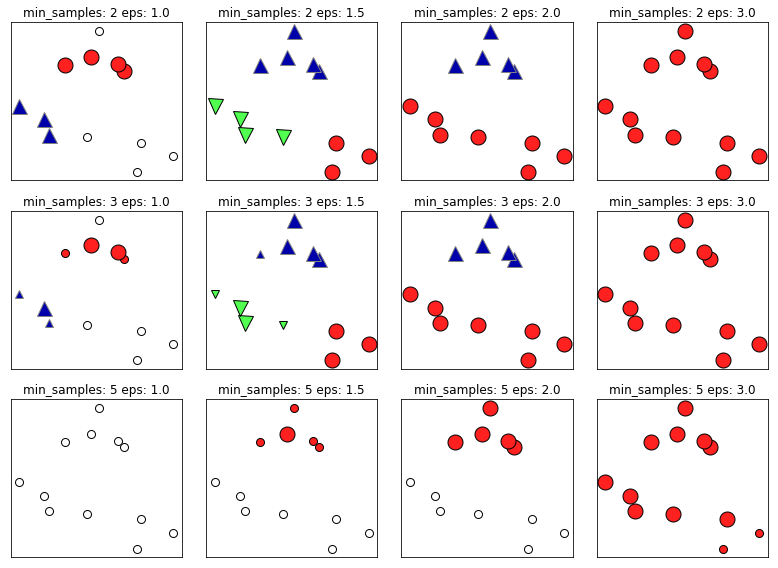

In [14]:
mglearn.plots.plot_dbscan()

Probemos qué sucede con el ejemplo de las medialunas.

Pertenencia a los Clusters:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


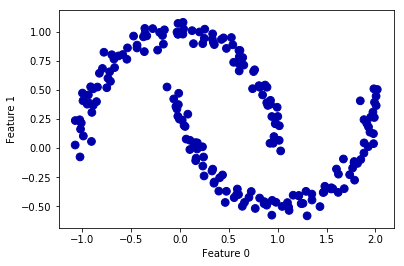

In [15]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
# graficamos la asignación de los grupos
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Pertenencia a los Clusters:\n{}".format(clusters))

Sólo un grupo pudo ser determinado, posiblemente por los parámetros por defecto en combinación con los datos. Cuando los datos se encuentran en escalas distintas, la no especificación del parámetro `eps` de forma adecuada no permitirá que DBSCAN obtenga buenos grupos. Otra manera de solucionar esto (se podría comenzar por esta solución) es escalar los datos para que todas las dimensiones tengan el mismo rango: `StandardScaler` o `MinMaxScaler` permiten hacer esto. 

Pertenencia a los Clusters:
[0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1]


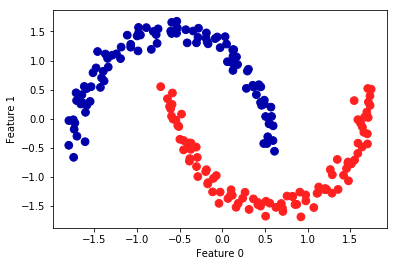

In [16]:
# Rescalar los datos a media cero y varianza uno
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

# graficamos la asignación de los grupos
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Pertenencia a los Clusters:\n{}".format(clusters))